In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
path = 'dataset-grades'
filename = 'qb_grades_athleticism.csv'

df = pd.read_csv(os.path.join(path, filename))
df.head(3)

,Player,Year,Race,Athleticism_Count,RunningAbility_Count,RunningAbility_Negative,RunningAbility_Positive,RunningAbility_Net,Athletic_Count,Athletic_Negative,Athletic_Positive,Athletic_Net,Escapability_Count,Escapability_Negative,Escapability_Positive,Escapability_Net
0,Chris Leak,2007,Non-White,3,1,0.0,1.0,1.0,1,0.0,1.0,1.0,1,0.0,1.0,1.0
1,John Beck,2007,White,1,0,0.0,0.0,0.0,1,1.0,0.0,-1.0,0,0.0,0.0,0.0
2,Drew Stanton,2007,White,4,1,0.0,1.0,1.0,2,0.0,1.0,1.0,1,0.0,1.0,1.0


In [3]:
""" GRADING SYSTEM

'Athleticism'
	'RunningAbility_Negative', 'RunningAbility_Positive', 'Athletic_Negative', 'Athletic_Positive',
        'Escapability_Negative', 'Escapability_Positive', 'InjuryConcerns' 
"""

" GRADING SYSTEM\n\n'Athleticism'\n\t'RunningAbility_Negative', 'RunningAbility_Positive', 'Athletic_Negative', 'Athletic_Positive',\n        'Escapability_Negative', 'Escapability_Positive', 'InjuryConcerns' \n"

In [4]:
# Separate White and Non-White Players
w = df[df['Race'] == 'White']
nw = df[df['Race'] == 'Non-White']

In [5]:
d = {'Title' : ['Average QB', 'Average White QB', 'Average Non-White QB'],
     'RunningAbility_Net' : [df['RunningAbility_Net'].mean(), w['RunningAbility_Net'].mean(), nw['RunningAbility_Net'].mean()],
     'Athletic_Net' : [df['Athletic_Net'].mean(), w['Athletic_Net'].mean(), nw['Athletic_Net'].mean()],
     'Escapability_Net' : [df['Escapability_Net'].mean(), w['Escapability_Net'].mean(), nw['Escapability_Net'].mean()]}

df_net = pd.DataFrame(d)
df_net = df_net[['Title', 'RunningAbility_Net', 'Athletic_Net', 'Escapability_Net']]
df_net

,Title,RunningAbility_Net,Athletic_Net,Escapability_Net
0,Average QB,0.388490,0.386940,0.074686
1,Average White QB,0.277098,0.263757,-0.047619
2,Average Non-White QB,0.684253,0.714012,0.399425


In [6]:
df_net.iat[1, 3] = 0
df_net

,Title,RunningAbility_Net,Athletic_Net,Escapability_Net
0,Average QB,0.388490,0.386940,0.074686
1,Average White QB,0.277098,0.263757,0.000000
2,Average Non-White QB,0.684253,0.714012,0.399425


In [7]:
d = {'Title' : ['Average QB', 'Average White QB', 'Average Non-White QB'],
     'RunningAbility_Positive' : [df['RunningAbility_Positive'].mean(), w['RunningAbility_Positive'].mean(), nw['RunningAbility_Positive'].mean()],
     'Athletic_Positive' : [df['Athletic_Positive'].mean(), w['Athletic_Positive'].mean(), nw['Athletic_Positive'].mean()],
     'Escapability_Positive' : [df['Escapability_Positive'].mean(), w['Escapability_Positive'].mean(), nw['Escapability_Positive'].mean()]}

df_pos = pd.DataFrame(d)
df_pos = df_pos[['Title', 'RunningAbility_Positive', 'Athletic_Positive', 'Escapability_Positive']]
df_pos

,Title,RunningAbility_Positive,Athletic_Positive,Escapability_Positive
0,Average QB,0.658868,0.643942,0.332154
1,Average White QB,0.596341,0.583177,0.261905
2,Average Non-White QB,0.824885,0.805282,0.518678


In [8]:
d = {'Title' : ['Average QB', 'Average White QB', 'Average Non-White QB'],
     'RunningAbility_Negative' : [df['RunningAbility_Negative'].mean(), w['RunningAbility_Negative'].mean(), nw['RunningAbility_Negative'].mean()],
     'Athletic_Negative' : [df['Athletic_Negative'].mean(), w['Athletic_Negative'].mean(), nw['Athletic_Negative'].mean()],
     'Escapability_Negative' : [df['Escapability_Negative'].mean(), w['Escapability_Negative'].mean(), nw['Escapability_Negative'].mean()]}

df_neg = pd.DataFrame(d)
df_neg = df_neg[['Title', 'RunningAbility_Negative', 'Athletic_Negative', 'Escapability_Negative']]
df_neg

,Title,RunningAbility_Negative,Athletic_Negative,Escapability_Negative
0,Average QB,0.270378,0.257002,0.257469
1,Average White QB,0.319243,0.319420,0.309524
2,Average Non-White QB,0.140632,0.091270,0.119253


In [9]:
categories_net = ['RunningAbility_Net', 'Athletic_Net', 'Escapability_Net']
categories_pos = ['RunningAbility_Positive', 'Athletic_Positive', 'Escapability_Positive']
categories_neg = ['RunningAbility_Negative', 'Athletic_Negative', 'Escapability_Negative']

In [14]:
categories = ['RunningAbility', 'Athletic', 'Escapability']

In [15]:
# Calculate angles for radar chart
offset = np.pi/3
angles = np.linspace(0, 2*np.pi, len(categories_net) + 1) + offset

In [16]:
# Function to create radar chart
def create_radar_chart(ax, angles, player_data, categories, color='#003594', title='', title_flag=False):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=40)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add Title
    ax.text(np.pi/2, 1.4, player_data[0], ha='center', va='center', size=50, color=color)
    
    if title_flag:
        ax.text(np.pi/2, 1.70, title, ha='center', va='center', size=55)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

def get_row_data(data, row):
    return np.asarray(data[data['Title'] == row])[0]

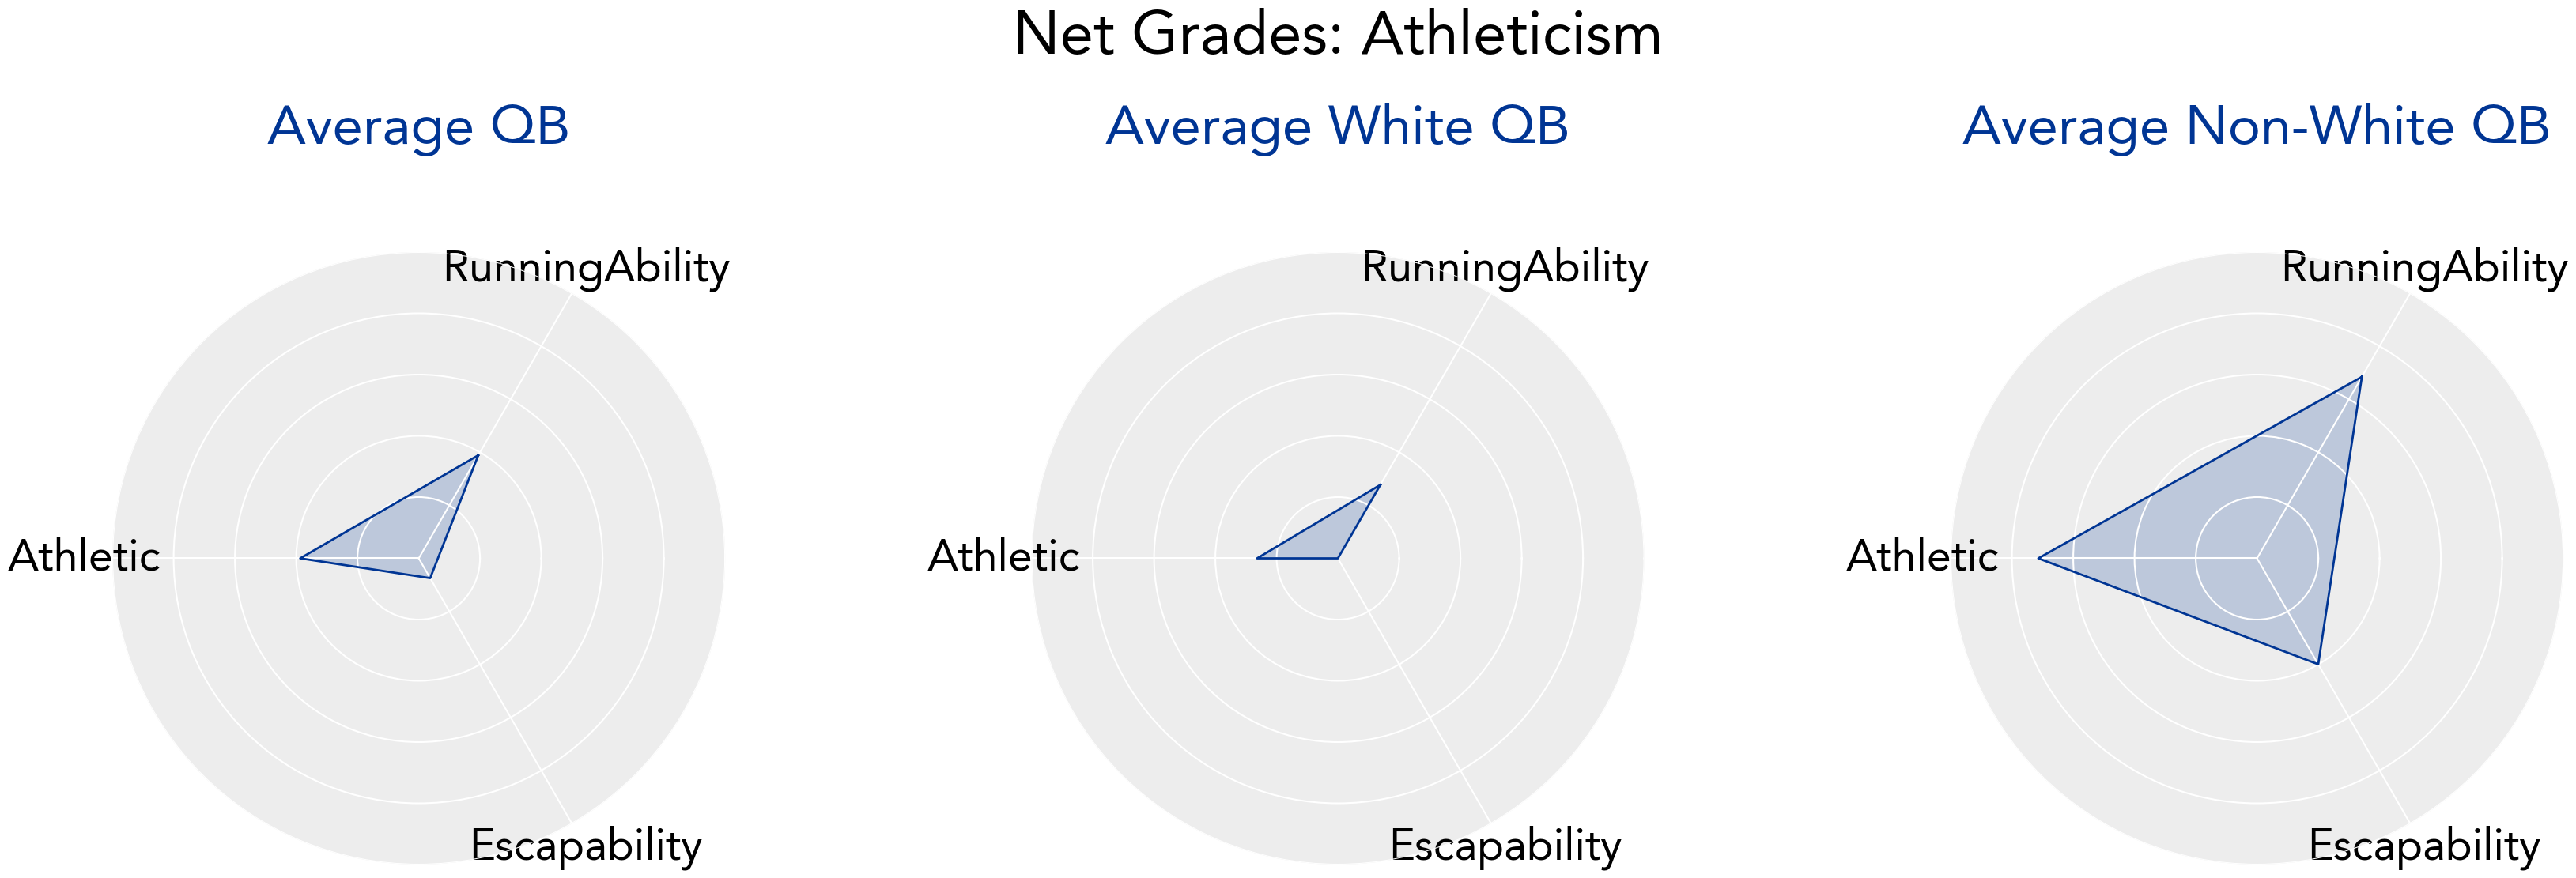

In [17]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_net, 'Average QB')
w_data = get_row_data(df_net, 'Average White QB')
nw_data = get_row_data(df_net, 'Average Non-White QB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories)
ax2 = create_radar_chart(ax2, angles, w_data, categories, title='Net Grades: Athleticism', title_flag=True)
ax3 = create_radar_chart(ax3, angles, nw_data, categories)

plt.show()

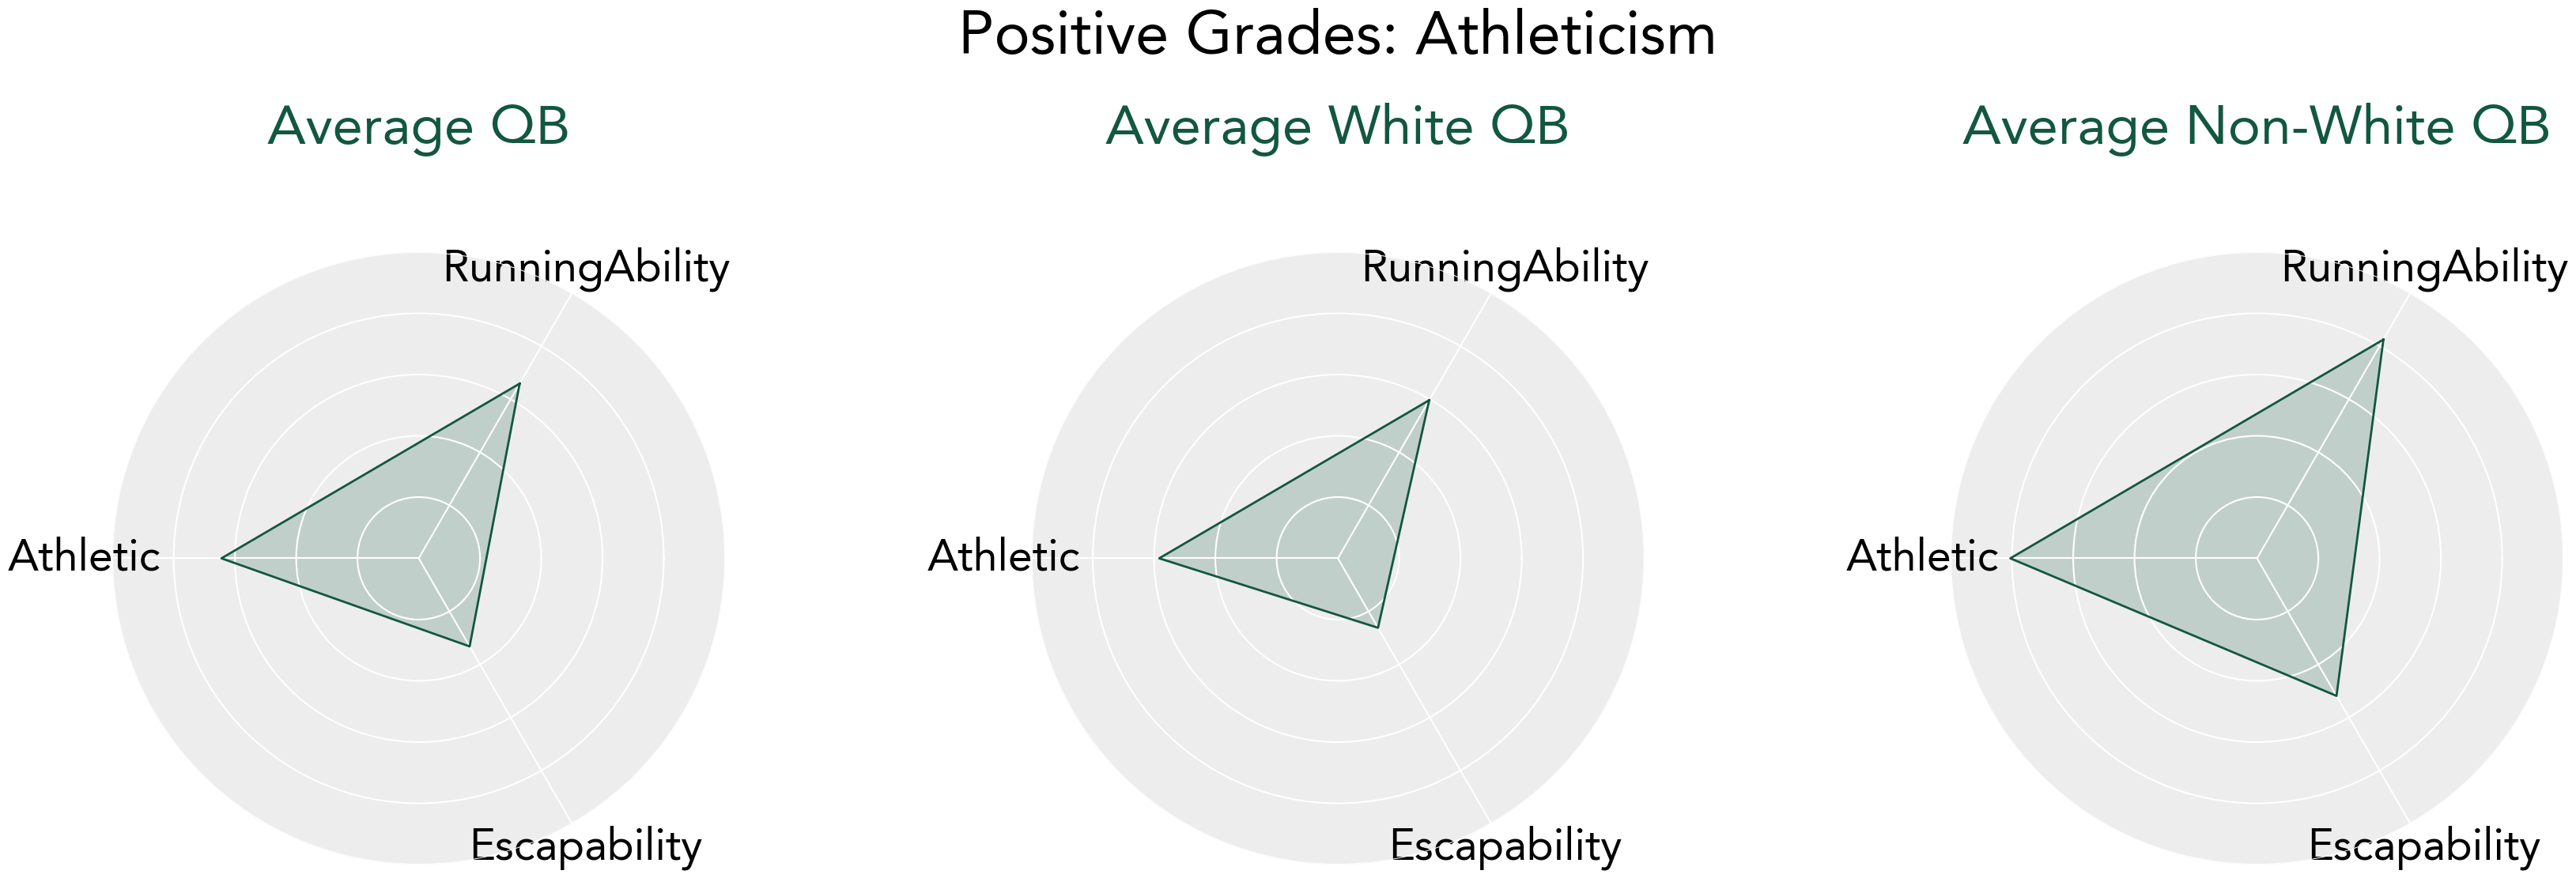

In [18]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_pos, 'Average QB')
w_data = get_row_data(df_pos, 'Average White QB')
nw_data = get_row_data(df_pos, 'Average Non-White QB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories, color='#125740')
ax2 = create_radar_chart(ax2, angles, w_data, categories, color='#125740', title='Positive Grades: Athleticism', title_flag=True)
ax3 = create_radar_chart(ax3, angles, nw_data, categories, color='#125740')

plt.show()

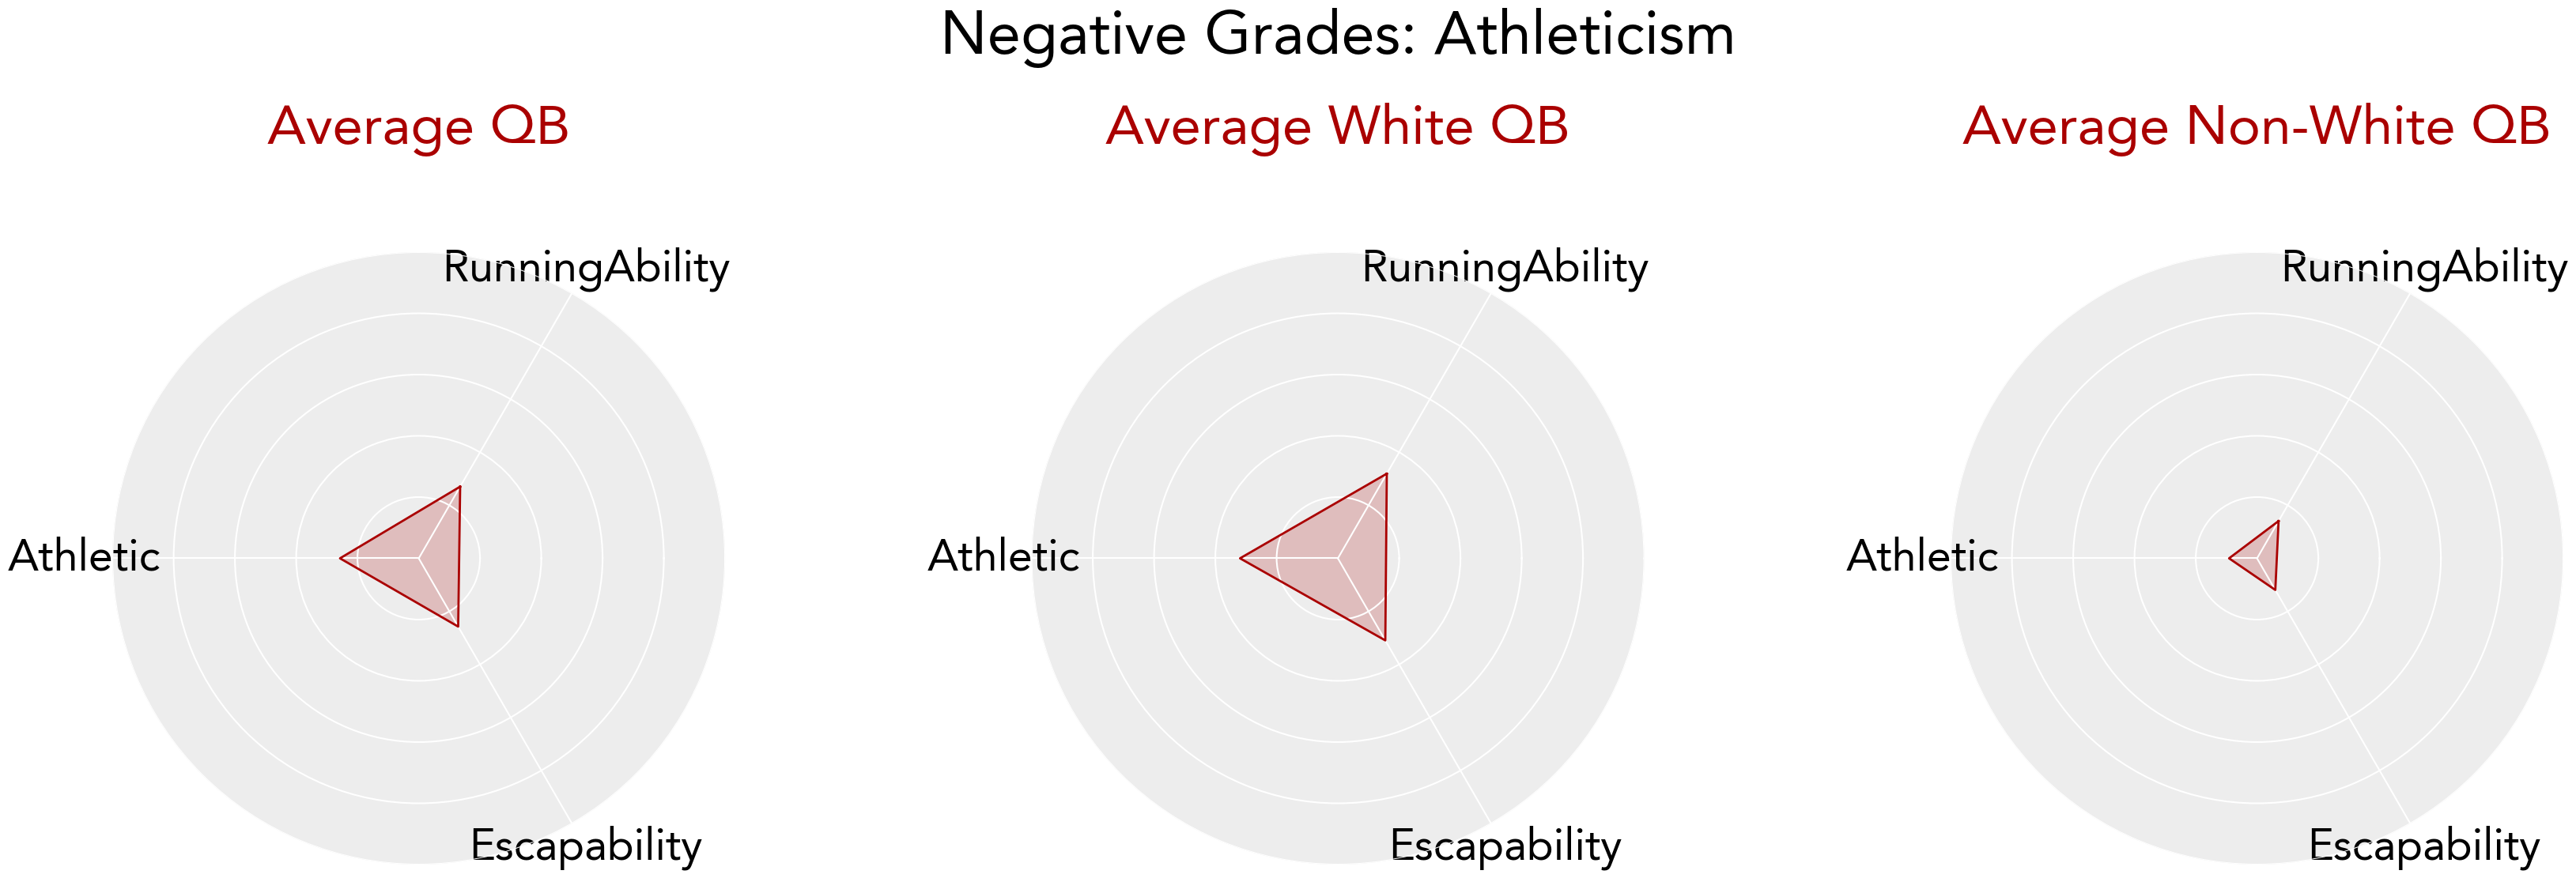

In [19]:
# General plot parameters
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 0
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['font.family'] = 'Avenir'

# Create figure
fig = plt.figure(figsize=(40, 40), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(131, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(132, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(133, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
all_data = get_row_data(df_neg, 'Average QB')
w_data = get_row_data(df_neg, 'Average White QB')
nw_data = get_row_data(df_neg, 'Average Non-White QB')

# Plot QB data
ax1 = create_radar_chart(ax1, angles, all_data, categories, color='#aa0000')
ax2 = create_radar_chart(ax2, angles, w_data, categories, color='#aa0000', title='Negative Grades: Athleticism', title_flag=True)
ax3 = create_radar_chart(ax3, angles, nw_data, categories, color='#aa0000')

plt.show()